## A Multiple Linear Regression Model to Predict Life Expectancy

### Based on Parameters like:
#### - Adult Mortality
#### - BMI
#### - Total Expenditure
#### - Population
#### - Schooling

#### And Multiple other factors....

In [1]:
using LinearAlgebra

In [ ]:
import Pkg

Pkg.add("Distributions")
Pkg.add("StatsPlots")
Pkg.add("HypothesisTests")
Pkg.add("GLM")
Pkg.add("ORCA")
Pkg.add("Plots")
Pkg.add("DataFrames")

In [ ]:
using Distributions
using DataFrames
using StatsPlots
using HypothesisTests
using GLM 
using ORCA
using Plots

In [4]:
using DelimitedFiles
data = DelimitedFiles.readdlm("case.csv", ',')

1584×18 Matrix{Float64}:
 263.0  62.0  0.01  71.2796   65.0  1154.0  19.1  …  17.2  0.479  10.1  65.0
 271.0  64.0  0.01  73.5236   62.0   492.0  18.6     17.5  0.476  10.0  59.9
 268.0  66.0  0.01  73.2192   64.0   430.0  18.1     17.7  0.47    9.9  59.9
 272.0  69.0  0.01  78.1842   67.0  2787.0  17.6     17.9  0.463   9.8  59.5
 275.0  71.0  0.01   7.09711  68.0  3013.0  17.2     18.2  0.454   9.5  59.2
 279.0  74.0  0.01  79.6794   66.0  1989.0  16.7  …  18.4  0.448   9.2  58.8
 281.0  77.0  0.01  56.7622   63.0  2861.0  16.2     18.6  0.434   8.9  58.6
 287.0  80.0  0.03  25.8739   64.0  1599.0  15.7     18.8  0.433   8.7  58.1
 295.0  82.0  0.02  10.9102   63.0  1141.0  15.2     19.0  0.415   8.4  57.5
 295.0  84.0  0.03  17.1715   64.0  1990.0  14.7     19.2  0.405   8.1  57.3
 291.0  85.0  0.02   1.38865  66.0  1296.0  14.2  …  19.3  0.396   7.9  57.3
 293.0  87.0  0.02  15.2961   67.0   466.0  13.8     19.5  0.381   6.8  57.0
 295.0  87.0  0.01  11.0891   65.0   798.0  13.4   

In [ ]:
X=data[:,1:17]

In [ ]:
y=data[:,18]

In [7]:
function normalEqn(X,y)
    theta= (inv(transpose(X)*X))*transpose(X)*y
    return theta
end

normalEqn (generic function with 1 method)

In [14]:
function plt(X,y,s)
    plot(X, y,   
    marker = (:cross, 5),
    title       = "Life Expectancy v.Feature", 
    xlabel    = s,
    ylabel    = "Life Expectancy(yrs)",   
    line   = (:scatter),
    ylims= (20.0,100.0),
    yticks= 20.0:10.0:100.0,
    leg= false,
    grid        = false)
end

plt (generic function with 1 method)

In [9]:
function randInitialise(features)
    W = zeros(Float64, features+1, 1)
    epsilon = 0.12
    W = ((rand(features+1, 1).* 2).* epsilon).-epsilon
    return W
end

randInitialise (generic function with 1 method)

In [10]:
function cost(X, y, theta)
    m = size(y, 1)
    J = (1/(2*m))*((transpose(X*theta-y))*(X*theta-y))
    return J
end

cost (generic function with 1 method)

In [11]:
function normalise(X)
    X_norm = X;
    mu = zeros(Float64, 1, size(X, 2))
    sigma = zeros(Float64, 1, size(X, 2))

    for i=1:size(X,2)
        mu[i]=mean(X[:, i])
        sigma[i]=std(X[:, i])
    end

    for i=1:size(X,2)
        X_norm[:,i]=X_norm[:,i].-mu[i]
        N=X_norm[:, i]/sigma[i]
        X_norm[:, i]=N
    end
    
    return X_norm,mu,sigma
end


normalise (generic function with 1 method)

In [12]:
function gradDesc(X, y, theta, alpha, num_iters)
    m= size(y,1);
    J_all= zeros(Float64, num_iters, 1)
    for i = 1:num_iters
        theta= theta - (alpha/m)*(transpose((transpose(X*theta-y))*X))
        J_all[i]=cost(X,y,theta)[1,1]
    end
    
    return theta,J_all
end

gradDesc (generic function with 1 method)

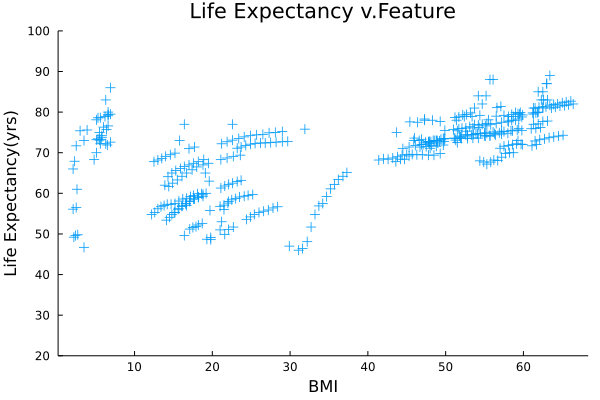

In [15]:
# Visualising data
# 1. Life Expectancy(yrs) v. BMI
plt(X[1:400,7],y[1:400], "BMI")

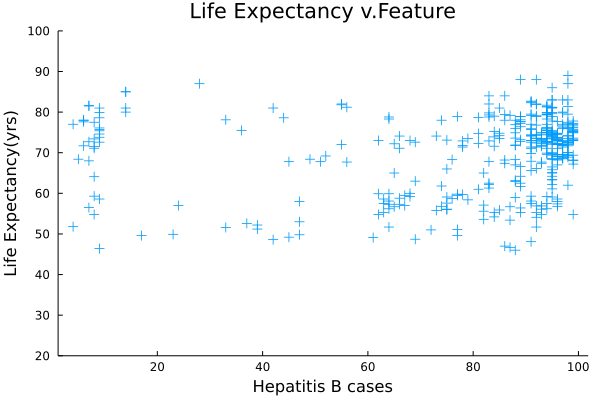

In [17]:
# Visualising data
# 2. Life Expectancy(yrs) v. Hepatitis B cases
plt(X[1:400,5],y[1:400], "Hepatitis B cases")

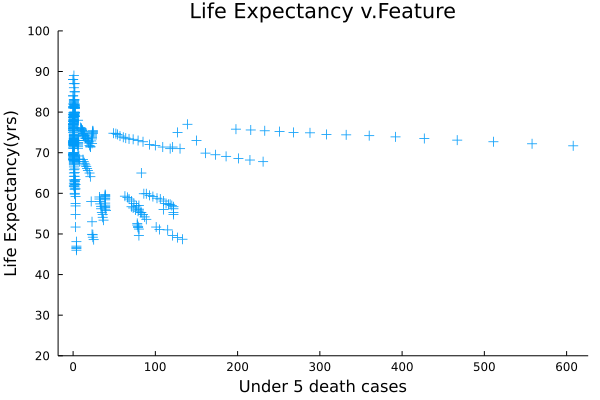

In [19]:
# Visualising data
# 3. Life Expectancy(yrs) v. Under 5 death cases
plt(X[1:400,8],y[1:400], "Under 5 death cases")

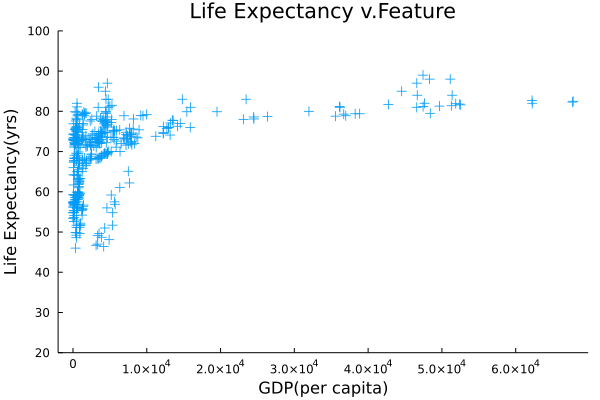

In [22]:
# Visualising data
# 4. Life Expectancy(yrs) v. GDP(per capita)
plt(X[1:400,13],y[1:400], "GDP(per capita)")


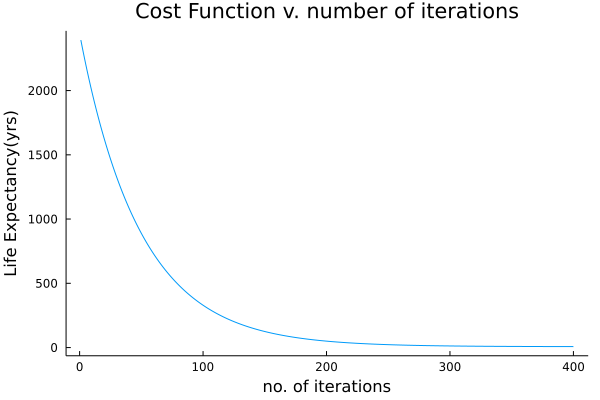

In [63]:
# Normalising Features
X= data[:,1:17]
X,mu,sigma= normalise(X)
X= [ones(Float64, size(y,1), 1) X]

# Running Gradient Descent
alpha = 0.01
num_iters = 400

theta= randInitialise(17)
# Theta(Parameters) from Gradient Descent
theta,J_all=gradDesc(X, y, theta, alpha, num_iters)

e= [i for i in 1:num_iters]
plot(e, J_all,   
    title       = "Cost Function v. number of iterations", 
    xlabel    = "no. of iterations",
    ylabel    = "Life Expectancy(yrs)",   
    line   = (:path),
    leg= false,
    grid        = false)

In [29]:
J_all[400]

7.317105931754739

In [33]:
#Parameters from normal equations
X2= data[:,1:17]
X2=[ones(Float64, size(y,1),1) X2]
theta2=normalEqn(X2, y)

18-element Vector{Float64}:
 53.833481671531445
 -0.01771532404172116
  0.08850340256045364
 -0.04774052818703467
  0.00034898109118383647
 -0.0066680817851615115
 -7.932738608843349e-6
  0.0313788138602078
 -0.0669136219860551
  0.006631913216790686
  0.07205496692731472
  0.014223331323146127
 -0.43587631128779014
  1.8893263013804174e-5
 -6.366997531621895e-10
 -0.052829583929295154
 10.058177977336078
  0.8555086741949828

### Now that we have our Parameters,
### We can set it to work on the Test Set.
### (Using parameters from both Gradient Descent and Normal Equation)

In [ ]:
using DelimitedFiles
data2 = DelimitedFiles.readdlm("case_t.csv", ',')


In [60]:
X_t= data2[:,1:17]
m_t=size(X_t,1)

# Using parameters from Gradient Descent
for i=1:m_t
    Xm= (transpose(X_t[i,:])-mu)./sigma
    price= [1.0 Xm]*theta
    println("Estimated Life Expectancy(in yrs) of Data #$(i):")
    println("=", round(price[1,1]; digits=2))
    println()
end

Estimated Life Expectancy(in yrs) of Data #1:
=58.07

Estimated Life Expectancy(in yrs) of Data #2:
=57.76

Estimated Life Expectancy(in yrs) of Data #3:
=57.09

Estimated Life Expectancy(in yrs) of Data #4:
=57.41

Estimated Life Expectancy(in yrs) of Data #5:
=57.27

Estimated Life Expectancy(in yrs) of Data #6:
=61.42

Estimated Life Expectancy(in yrs) of Data #7:
=55.54

Estimated Life Expectancy(in yrs) of Data #8:
=55.44

Estimated Life Expectancy(in yrs) of Data #9:
=77.12

Estimated Life Expectancy(in yrs) of Data #10:
=76.33



In [61]:
# Using parameters from Normal equation
for i=1:m_t
    price= [1.0 transpose(X_t[i,:])]*theta2
    println("Estimated Life Expectancy(in yrs) of Data #$(i):")
    println("=", round(price[1,1]; digits=2))
    println()
end

Estimated Life Expectancy(in yrs) of Data #1:
=58.37

Estimated Life Expectancy(in yrs) of Data #2:
=57.99

Estimated Life Expectancy(in yrs) of Data #3:
=57.05

Estimated Life Expectancy(in yrs) of Data #4:
=57.43

Estimated Life Expectancy(in yrs) of Data #5:
=57.29

Estimated Life Expectancy(in yrs) of Data #6:
=60.69

Estimated Life Expectancy(in yrs) of Data #7:
=55.5

Estimated Life Expectancy(in yrs) of Data #8:
=55.06

Estimated Life Expectancy(in yrs) of Data #9:
=78.19

Estimated Life Expectancy(in yrs) of Data #10:
=77.29

